
   # The ``stallings_graphs`` package

## Pascal Weil, CNRS, Univ. Bordeaux, LaBRI

## Dagstuhl, March 2019

## What is this about?

This is a presentation of a Sage package

Sage is a free, open source computer algebra system, which can be downloaded on any machine (sagemath.org)

The objective is to play, experiment with finitely generated subgroups of free groups --- and, in the future, of other groups.

## How do we handle subgroups?

The ``internal`` representation of a subgroup `H`of `F_r` is an `r`-tuple of partial injections on a finite set --- these partial injections specify the Stallings graph of `H`. 

The number of vertices of that graph (of the set on which the partial injections are defined) is the ``size`` of `H`.

A subgroup `H` of `F_r` can be specified by:

- a tuple of words (generators)

- a graph (folded or not), with a base vertex

- an `r`-tuple of partial injections

- or a random instance of a given size.

## What can we do with ``stallings_graphs``?

The package allows to compute a ``basis``, a ``conjugate``, the ``intersection`` of two subgroups,

to test for ``finite index``, ``malnormality``, ``conjugacy``.

The ``random generator`` allows testing conjectures or experimentally refining asymptotic properties.

# Now for a demo!

In [11]:
from stallings_graphs import *

In [12]:
L = ['ab','ba']
H1 = FinitelyGeneratedSubgroup.from_generators(L,alphabet_type = 'abc'); H1

A subgroup of the free group of rank 2, whose Stallings graph has 3 vertices

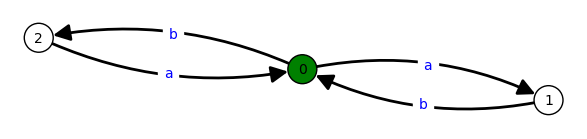

In [17]:
H1.show_Stallings_graph(alphabet_type='abc',visu_tool='plot')

In [21]:
t = H1.show_Stallings_graph(alphabet_type='abc',visu_tool='tikz');t.tex()

'/Users/pascalweil/.sage/temp/MacBook-Air-2019-PW.local/727/tikz_tZmcCC.tex'

In [26]:
L = ['ab','ba', 'aBab']
H1 = FinitelyGeneratedSubgroup.from_generators(L,alphabet_type = 'abc')   

In [27]:
H1.has_index()

2

In [28]:
L2 = ['ba', 'bbaa', 'bbbaaaa', 'bbbb']
H2 = FinitelyGeneratedSubgroup.from_generators(L2,alphabet_type='abc')
L3 = ['ab', 'baa', 'aaBaa', 'bbbb', 'BabA']
H3 = FinitelyGeneratedSubgroup.from_generators(L3,alphabet_type='abc')

In [30]:
#H2.is_conjugated_to(H3, alphabet_type = 'abc')
b, s = H2.is_conjugated_to(H3, conjugator=True, alphabet_type = 'abc')
b, s

(True, word: bb)

In [31]:
H4 = H3.conjugated_by(s, alphabet_type = 'abc')
H2 == H4

True

In [44]:
H5 = FinitelyGeneratedSubgroup.random_instance(10000,2); H5

A subgroup of the free group of rank 2, whose Stallings graph has 10000 vertices

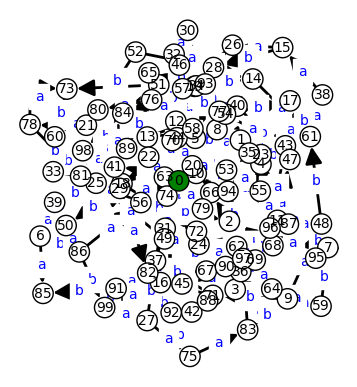

In [40]:
H5.show_Stallings_graph(alphabet_type='abc',visu_tool='plot')

In [45]:
print H5.rank()
#H5.basis(alphabet_type = 'abc')

9806


In [46]:
L = ['cbac', 'cbbc', 'a', 'CaCB', 'caC', 'baBC', 'ccc', 'bb', 'cbcB']
H3 = FinitelyGeneratedSubgroup.from_generators(L,alphabet_type='abc')

In [48]:
# H3.is_malnormal(alphabet_type='abc')
b, s, t = H3.is_malnormal(alphabet_type='abc', witness=True)
b, s, t

(False, word: a, word: c)

`s` is in the intersection of `H2` and its conjugate by `t`.

In [49]:
K = H3.conjugated_by(t,alphabet_type = 'abc')
print H3.contains_element(s,alphabet_type = 'abc')
print K.contains_element(s,alphabet_type = 'abc')

True
True


In [50]:
L1 = ['ab', 'ba']
H1 = FinitelyGeneratedSubgroup.from_generators(L1, alphabet_type='abc')
L3 = ['abbA', 'Baab', 'aabb']
H3 = FinitelyGeneratedSubgroup.from_generators(L3, alphabet_type='abc')

In [51]:
H4 = H1.intersection(H3)

In [52]:
H4.rank()

1

In [53]:
H4.basis(alphabet_type='abc')

[word: abbabaab]

In [70]:
sample_size = 40000
instance_size = 15
number_of_malnormal = 0
for x in range(sample_size):
    H = FinitelyGeneratedSubgroup.random_instance(instance_size)
    if H.is_malnormal():
        number_of_malnormal +=1
print 'number of malnormal subgroups of size', instance_size, 'among', sample_size, ':', number_of_malnormal

number of malnormal subgroups of size 15 among 40000 : 38


In [59]:
from stallings_graphs.about_words import *

In [61]:
sample_size = 20
number_of_words = 20
length_of_words = 20 
number_of_malnormal = 0
number_of_lesser_rank = 0
for x in range(sample_size):
    L = [random_reduced_word(length_of_words,2) for _ in range(number_of_words)]
    H = FinitelyGeneratedSubgroup.from_generators(L)
    if H.is_malnormal():
        number_of_malnormal +=1
    if H.rank() != number_of_words:
        number_of_lesser_rank +=1
print 'number of malnormal subgroups generated by ', number_of_words, 'words of length', length_of_words, 'among ', sample_size, ': ', number_of_malnormal
print 'number of subgroups not freely generated, by ', number_of_words, 'words of length', length_of_words, 'among ', sample_size, ': ', number_of_lesser_rank        


number of malnormal subgroups generated by  20 words of length 20 among  20 :  20
number of subgroups not freely generated, by  20 words of length 20 among  20 :  0


Thanks to the creators of ``Jupyter``, who designed this programming interface

and to my LaBRI colleagues ``Vincent Delecroix`` and ``Sébastien Labbé`` who convinced me that I could complete this programming project!